# **PRACTICA DE VINOS**





### Importando librerías y cargando datos:

In [ ]:
#Importando paquetes que se utlizarán
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
#Cargando Dataset
vinos = pd.read_csv('vinos_tintos.csv')

## **ANÁLISIS UNIVARIADO Y LIMPIEZA DE DATOS**

In [ ]:
#Imprimiendo los primeros valores del Dataset
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,country,pricing
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,49.0,Spain,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,0.098,52.0,Italy,Expensive
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,0.098,52.0,Italy,Expensive
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,0.098,72.0,Italy,Budget
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,56.0,Italy,Budget


In [ ]:
#Mirando tipología de las variables
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1594 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1594 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1594 non-null   float64
 11  success               1599 non-null   float64
 12  country               1599 non-null   object 
 13  pricing               1599 non-null   object 
dtypes: float64(12), object(2)
memory usage: 175.0+ KB


In [ ]:
#Imprimiendo datos estadísticos del Dataset
vinos.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
count,1594.000000,1599.000000,1599.000000,1594.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1594.000000,1599.000000
mean,8.321455,0.527821,0.270976,2.521982,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,0.104240,57.774234
std,1.741475,0.179060,0.194801,1.438068,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,0.010659,14.174611
min,4.600000,0.120000,0.000000,-4.021123,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,0.084000,-0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,0.095000,48.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,0.102000,57.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,0.111000,67.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,0.149000,96.000000


### **Empezando a graficar**

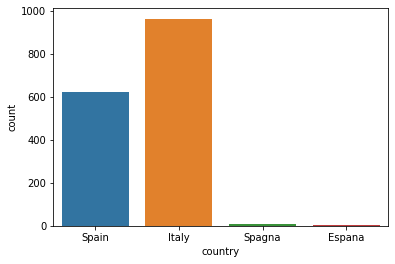

In [ ]:
#Analizando la providencia geografica con un gráfico de barras
sns.countplot(x='country', data=vinos) 

En el gráfico anterior se observa que hay datos mal escritos y se requiere realizar esa limpieza para poder obtener lo que se desea, a continuación se limpiará y se plasmará el gráfico nuevo:

In [ ]:
#Seleccionando datos que contienen 'spa'
datos_españa = vinos['country'].str.contains('spa', case = False)
datos_españa

0        True
1       False
2       False
3       False
4       False
        ...  
1594     True
1595    False
1596    False
1597    False
1598     True
Name: country, Length: 1599, dtype: bool

In [ ]:
#Los datos que contengas 'spa' se convertirán en 'Spain'
vinos['country'] = np.where(datos_españa,'Spain',vinos['country']) #where contenga algo que diga 'spa' pasalo a Spain

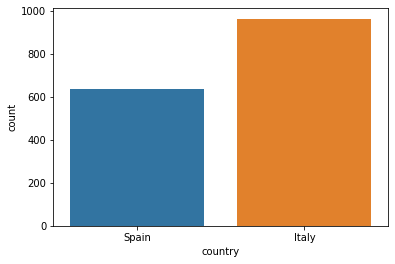

In [ ]:
sns.countplot(x='country', data=vinos) 

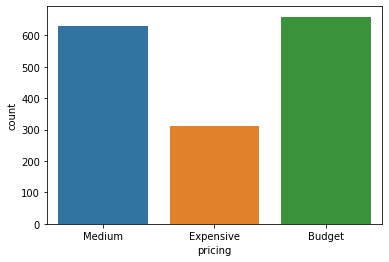

In [ ]:
#Gráfico de barras de rango de precios
sns.countplot(x='pricing', data=vinos)

### Explorando variables númericas

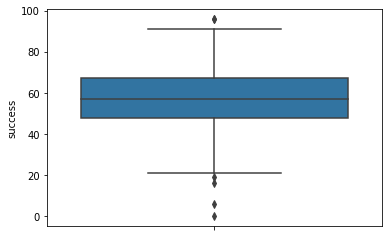

In [ ]:
#Gráfico de cajas de la variable succes
sns.boxplot(y='success', data=vinos) 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


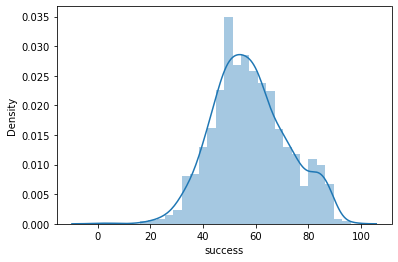

In [ ]:
sns.distplot(vinos['success'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


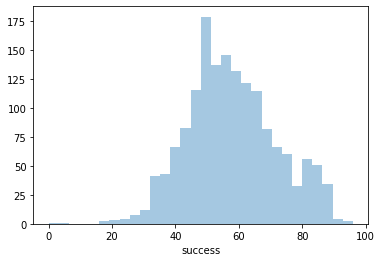

In [ ]:
#Para ver las frecuencias en lugar de probabilidades
sns.distplot(vinos['success'], kde=False)

# **ANÁLISIS MULTIVARIADO**

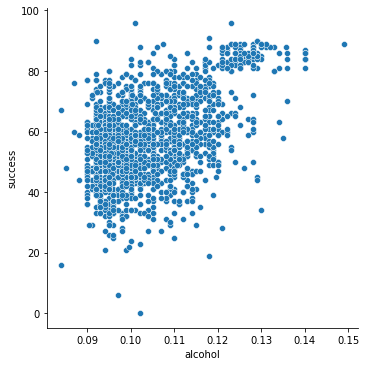

In [ ]:
#Graficando un scatterplot
sns.relplot(x='alcohol', y='success', data = vinos)

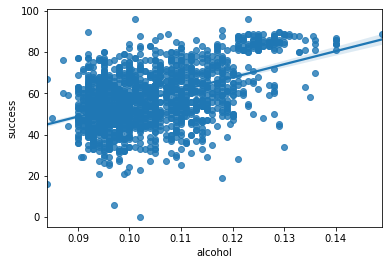

In [ ]:
#Añadiendo línea de tendencia
sns.regplot(x='alcohol', y='success', data = vinos)

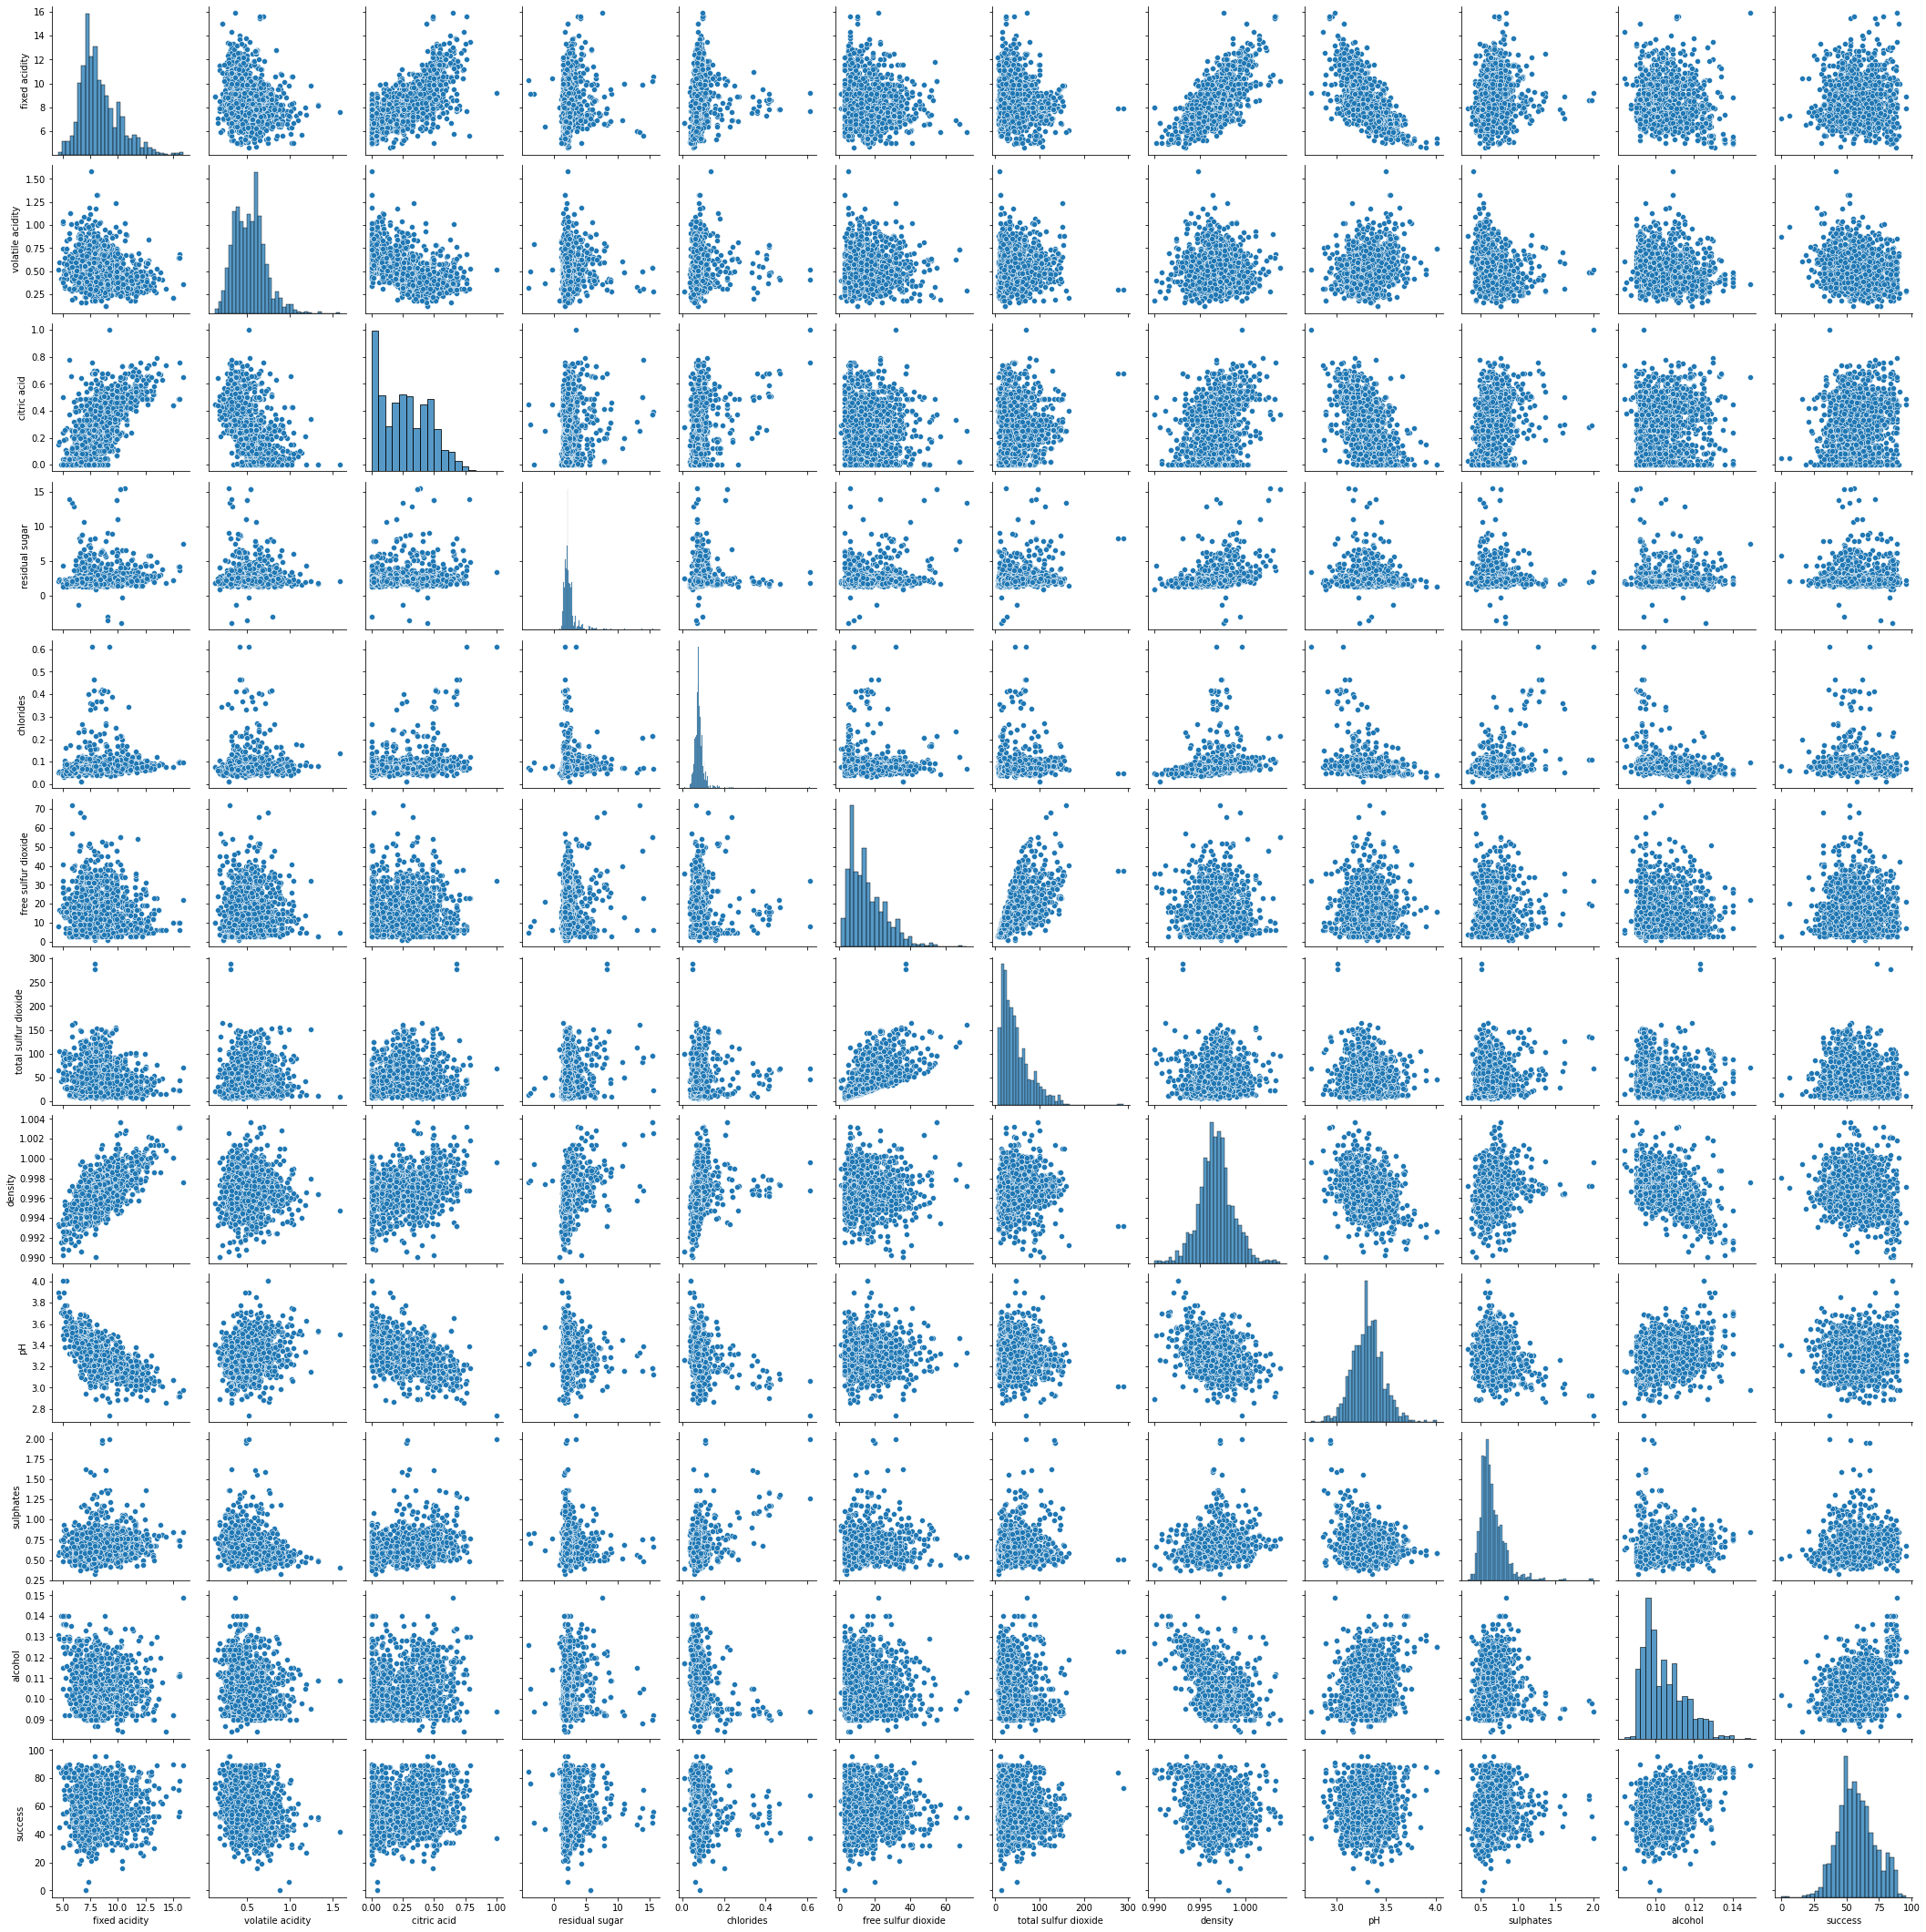

In [ ]:
#Observando los scatterplot de las variables, parejas de gráficos
sns.pairplot(vinos)

AxesSubplot(0.125,0.125;0.775x0.755)


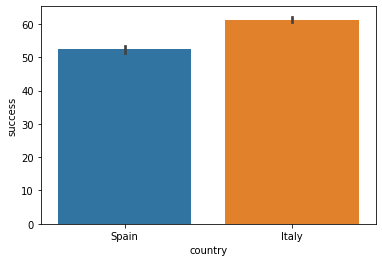

In [ ]:
#Correlacionando variables categórica y númerica
print(sns.barplot(x='country',y='success', data=vinos))

AxesSubplot(0.125,0.125;0.775x0.755)


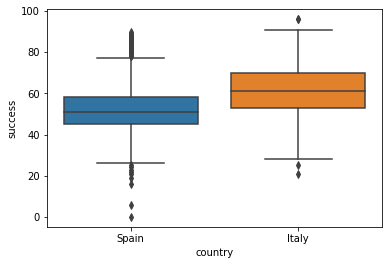

In [ ]:
#Mismas variables con bloxplot
print(sns.boxplot(x='country',y='success', data=vinos))

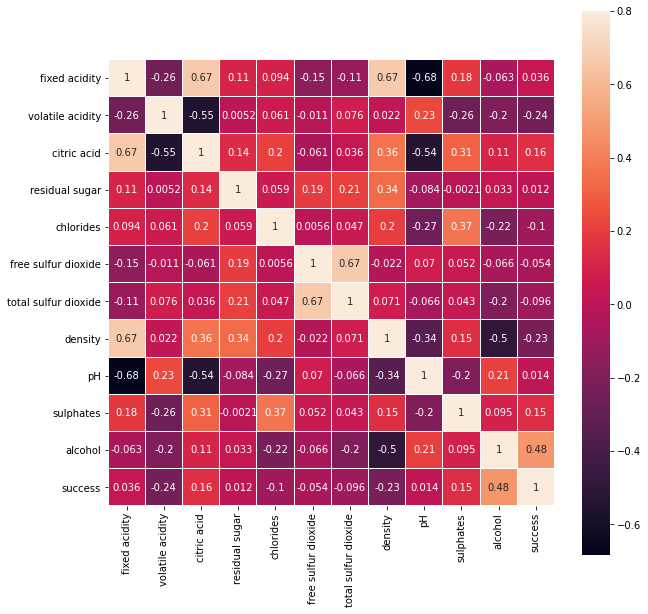

In [ ]:
#Para mirar todas las correlaciones
cor = vinos.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,vmax=.8, linewidths=0.01,  
            square=True, annot= True)

## **Visualización de datos**

### Principios de una buena **visualización**

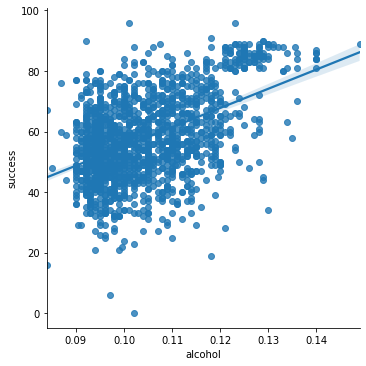

In [ ]:
#correlación de las varibales alcohol y success
sns.lmplot(x='alcohol', y='success', data=vinos)

¿Cómo mejorar el gráfico?

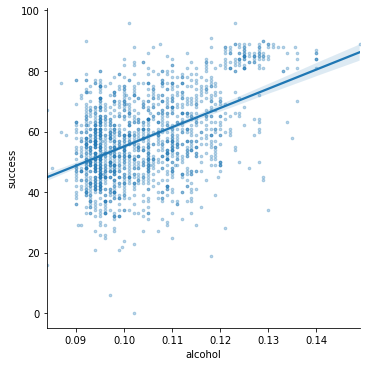

In [ ]:
sns.lmplot(x='alcohol', y='success', data=vinos, truncate=True, scatter_kws={'s':7,'alpha':0.3})

¿La correlación es igual para vinos españoles e italianos o es diferente?

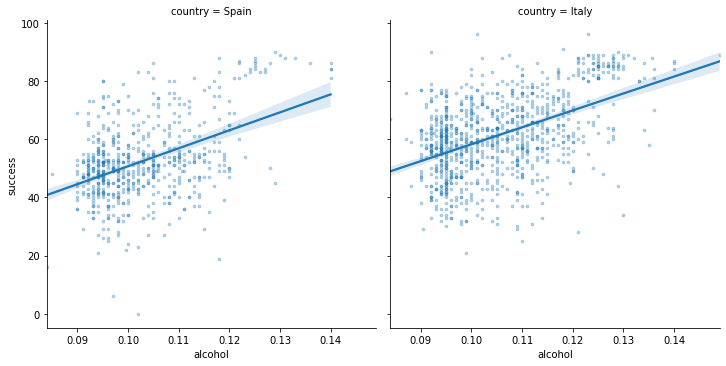

In [ ]:
#Ejecutando un gráfico por cada país
sns.lmplot(x='alcohol', y='success', col='country', data=vinos, truncate=True, scatter_kws={'s':7,'alpha':0.3})

Continuando con la mejora del gráfico

Text(0.5, 1.0, 'Vinos Italianos')

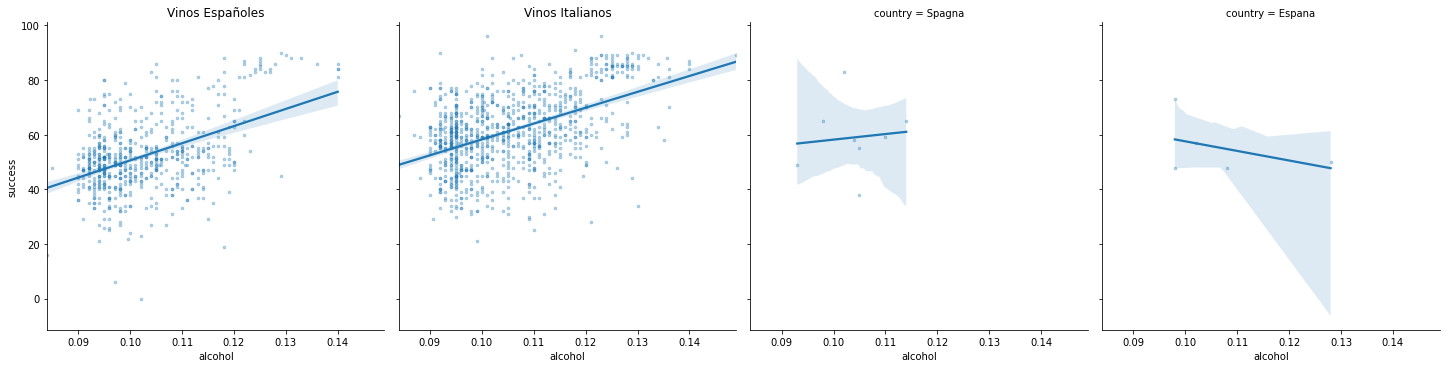

In [ ]:
alcohol_exito = sns.lmplot(x='alcohol', y='success', col='country', data=vinos, truncate=True, scatter_kws={'s':7,'alpha':0.3})
sns.despine()
axes = alcohol_exito.axes.flatten()
axes[0].set_title('Vinos Españoles')
axes[1].set_title('Vinos Italianos')

[Text(0.08, 0, '8.0%'),
 Text(0.09, 0, '9.0%'),
 Text(0.1, 0, '10.0%'),
 Text(0.11, 0, '11.0%'),
 Text(0.12, 0, '12.0%'),
 Text(0.13, 0, '13.0%'),
 Text(0.14, 0, '14.0%'),
 Text(0.15000000000000002, 0, '15.0%')]

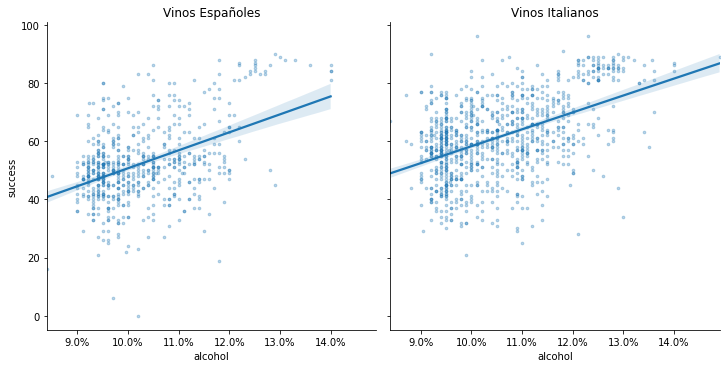

In [ ]:
#Cambiando los valores de alcohol a porcentaje
alcohol_exito = sns.lmplot(x='alcohol', y='success', col='country', data=vinos, truncate=True, scatter_kws={'s':7,'alpha':0.3})
sns.despine()
axes = alcohol_exito.axes.flatten()
axes[0].set_title('Vinos Españoles')
axes[1].set_title('Vinos Italianos')
vals = axes[1].get_xticks()
axes[1].set_xticklabels(['{:,.1%}'.format(x)for x in vals])

### Contando una **historia**

Text(0.5, 0.98, 'Si hay más alcohol... hay más éxito, tanto en España como Italia \n ¡Se puede predecir el ÉXITO de un vino')

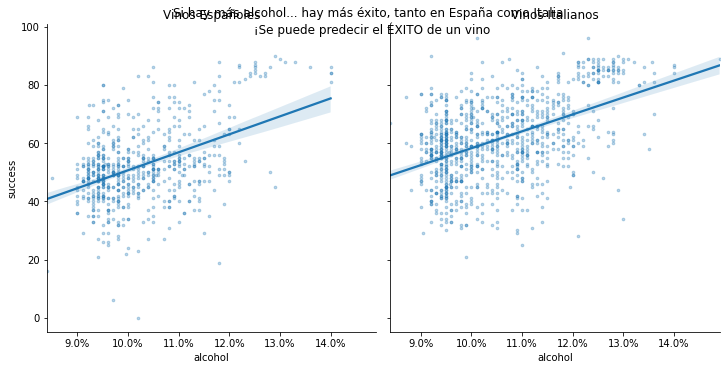

In [ ]:
alcohol_exito = sns.lmplot(x='alcohol', y='success', col='country', data=vinos, truncate=True, scatter_kws={'s':7,'alpha':0.3})
sns.despine()
axes = alcohol_exito.axes.flatten()
axes[0].set_title('Vinos Españoles')
axes[1].set_title('Vinos Italianos')
vals = axes[1].get_xticks()
axes[1].set_xticklabels(['{:,.1%}'.format(x)for x in vals])
plt.suptitle('Si hay más alcohol... hay más éxito, tanto en España como Italia \n ¡Se puede predecir el ÉXITO de un vino')
